### ✅Step 1: Load and Explore AG News Dataset

In [1]:
import pandas as pd

Dataset's link -> https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

In [2]:
train_df = pd.read_csv(r"C:\Users\moham\OneDrive\Desktop\Courses\Elevvo Internship\News Category Classification\Data\train.csv")
test_df = pd.read_csv(r"C:\Users\moham\OneDrive\Desktop\Courses\Elevvo Internship\News Category Classification\Data\test.csv")

In [3]:
train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
train_df["Text"] = train_df["Title"].fillna('') + " " + train_df["Description"].fillna('')
test_df["Text"] = test_df["Title"].fillna('') + " " + test_df["Description"].fillna('')

In [5]:
train_df.head()

,Class Index,Title,Description,Text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [6]:
train_df['Class Index'].value_counts()

Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64

### ✅ Step 2: Preprocess the Text

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [10]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)                  # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)               # remove numbers and punctuation
    words = [stemmer.stem(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

In [11]:
train_df["Clean_Text"] = train_df["Text"].apply(preprocess)
test_df["Clean_Text"] = test_df["Text"].apply(preprocess)

In [12]:
train_df[["Text", "Clean_Text"]].head()

,Text,Clean_Text
0,Wall St. Bears Claw Back Into the Black (Reute...,wall st bear claw back black reuter reuter sho...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,carlyl look toward commerci aerospac reuter re...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,oil economi cloud stock outlook reuter reuter ...
3,Iraq Halts Oil Exports from Main Southern Pipe...,iraq halt oil export main southern pipelin reu...
4,"Oil prices soar to all-time record, posing new...",oil price soar alltim record pose new menac us...


### ✅ Step 3: TF-IDF Vectorization

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# Use unigrams and bigrams
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

In [15]:
X_train = vectorizer.fit_transform(train_df["Clean_Text"])
X_test = vectorizer.transform(test_df["Clean_Text"])

In [16]:
y_train = train_df["Class Index"]
y_test = test_df["Class Index"]

In [17]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (120000, 10000)
Test shape: (7600, 10000)


### ✅ Step 4: Train & Evaluate

##### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [19]:
clf = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)

c:\Users\moham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [20]:
y_pred = clf.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9125

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.90      0.92      1900
           2       0.95      0.98      0.96      1900
           3       0.88      0.88      0.88      1900
           4       0.88      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

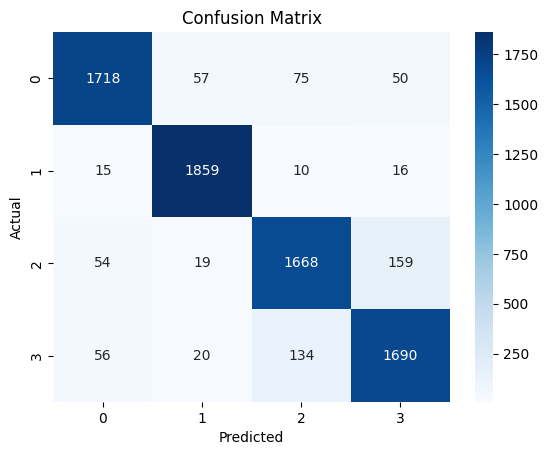

In [23]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### SVM (Support Vector Machine)

In [24]:
from sklearn.svm import LinearSVC

In [25]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

In [26]:
svm_preds = svm_model.predict(X_test)

In [27]:
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_preds))

SVM Accuracy: 0.9140789473684211

SVM Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.91      0.92      1900
           2       0.95      0.98      0.97      1900
           3       0.89      0.88      0.88      1900
           4       0.89      0.90      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



##### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=7)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

In [30]:
rf_preds = rf_model.predict(X_test)


In [31]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.8927631578947368

Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.89      0.90      1900
           2       0.92      0.97      0.94      1900
           3       0.86      0.86      0.86      1900
           4       0.87      0.85      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



##### ✅ Comparison Code (Accuracy + Macro F1 Score)

In [32]:
from sklearn.metrics import f1_score

Collect predictions (assumes these are already computed)

y_pred     → Logistic Regression

svm_preds  → SVM

rf_preds   → Random Forest

In [33]:
print("🔍 Model Comparison:")
print("-" * 40)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

print("\nSVM:")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("F1 Score (macro):", f1_score(y_test, svm_preds, average='macro'))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("F1 Score (macro):", f1_score(y_test, rf_preds, average='macro'))

🔍 Model Comparison:
----------------------------------------
Logistic Regression:
Accuracy: 0.9125
F1 Score (macro): 0.9123316868547544

SVM:
Accuracy: 0.9140789473684211
F1 Score (macro): 0.9139102165675311

Random Forest:
Accuracy: 0.8927631578947368
F1 Score (macro): 0.8923132460021638


### ✅ Step 5: Try Word Embeddings (GloVe)

##### Load GloVe Vectors (100D)

In [34]:
import numpy as np

In [35]:
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.split()
            word = parts[0]
            vector = np.array(parts[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

In [36]:
glove_path = r"C:\Users\moham\OneDrive\Desktop\Courses\Elevvo Internship\News Category Classification\Data\glove.6B.100d.txt"
glove_embeddings = load_glove_embeddings(glove_path)
print("Loaded GloVe word vectors:", len(glove_embeddings))

Loaded GloVe word vectors: 400000


##### Convert Each Document to an Average Embedding

In [37]:
def text_to_embedding(text, embeddings, dim=100):
    words = text.split()
    valid_vecs = [embeddings[word] for word in words if word in embeddings]
    if valid_vecs:
        return np.mean(valid_vecs, axis=0)
    else:
        return np.zeros(dim)

In [38]:
X_train_glove = np.array([text_to_embedding(text, glove_embeddings) for text in train_df["Clean_Text"]])
X_test_glove = np.array([text_to_embedding(text, glove_embeddings) for text in test_df["Clean_Text"]])

##### Train a Classifier on GloVe Embeddings

In [39]:
clf_glove = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
clf_glove.fit(X_train_glove, y_train)

c:\Users\moham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [40]:
y_pred_glove = clf_glove.predict(X_test_glove)

In [41]:
print("GloVe Embedding Model Accuracy:", accuracy_score(y_test, y_pred_glove))
print("\nGloVe Classification Report:\n", classification_report(y_test, y_pred_glove))

GloVe Embedding Model Accuracy: 0.8623684210526316

GloVe Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.87      0.88      1900
           2       0.93      0.94      0.94      1900
           3       0.80      0.81      0.81      1900
           4       0.84      0.82      0.83      1900

    accuracy                           0.86      7600
   macro avg       0.86      0.86      0.86      7600
weighted avg       0.86      0.86      0.86      7600



### ✅ Step 6: Try XGBoost on TF-IDF or GloVe

In [42]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [43]:
y_train_shifted = y_train - 1
y_test_shifted = y_test - 1

In [44]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_shifted)

c:\Users\moham\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:44:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [45]:
xgb_preds = xgb_model.predict(X_test)


In [47]:
print("✅ XGBoost Accuracy:", accuracy_score(y_test_shifted, xgb_preds))
print("\n✅ XGBoost Classification Report:\n", classification_report(y_test_shifted, xgb_preds, target_names=["World", "Sports", "Business", "Sci/Tech"]))

✅ XGBoost Accuracy: 0.8948684210526315

✅ XGBoost Classification Report:
               precision    recall  f1-score   support

       World       0.92      0.90      0.91      1900
      Sports       0.93      0.96      0.94      1900
    Business       0.87      0.86      0.86      1900
    Sci/Tech       0.87      0.86      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



### ✅ Step 7: Visualizations

##### 📊 1. Class Distribution (Train Set)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\moham\AppData\Local\Temp\ipykernel_25868\2416548552.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label", data=train_df, palette="Set2")


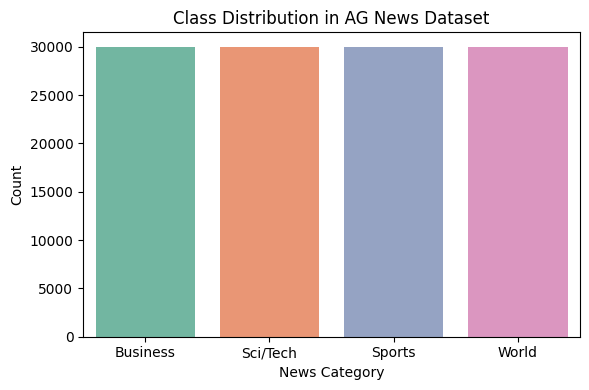

In [49]:
label_map = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

train_df["Label"] = train_df["Class Index"].map(label_map)

plt.figure(figsize=(6, 4))
sns.countplot(x="Label", data=train_df, palette="Set2")
plt.title("Class Distribution in AG News Dataset")
plt.xlabel("News Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

##### 📉 2. Confusion Matrix for XGBoost (Shifted Labels)

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
cm = confusion_matrix(y_test_shifted, xgb_preds)

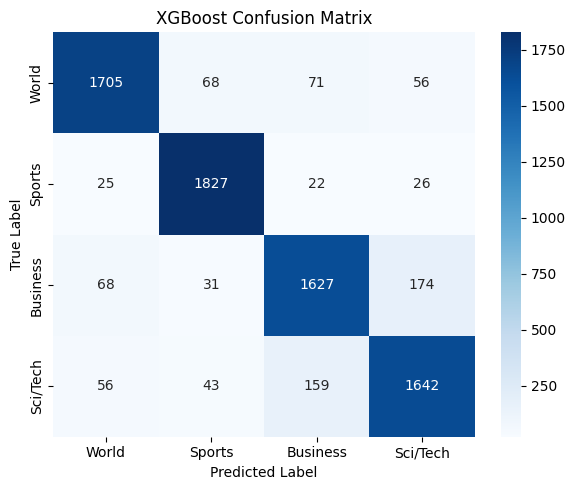

In [52]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_map.values(),
            yticklabels=label_map.values())

plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

##### 🧠 3. (Optional) Top Words Per Class (Logistic Regression Only)

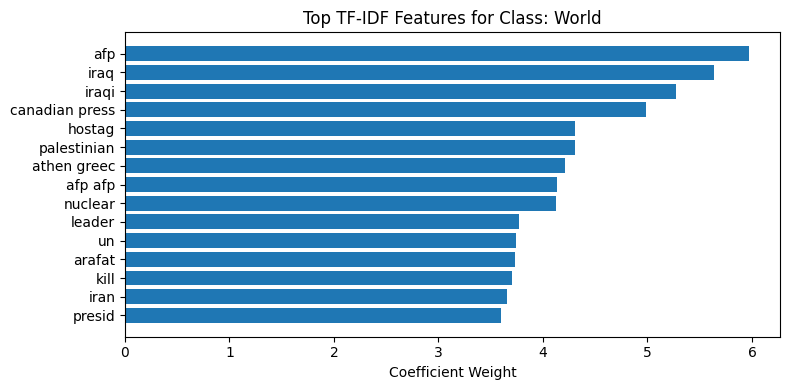

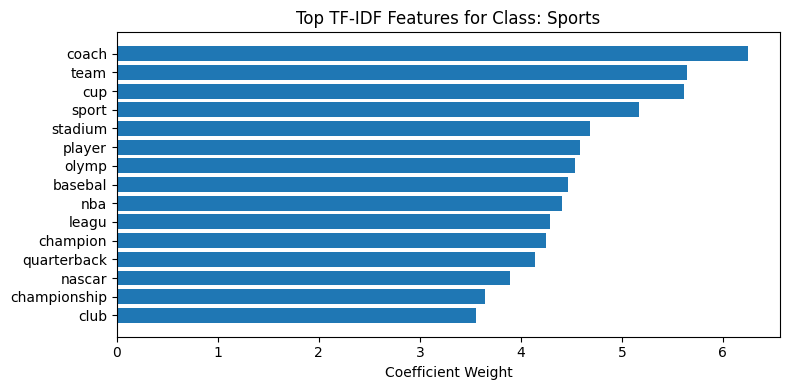

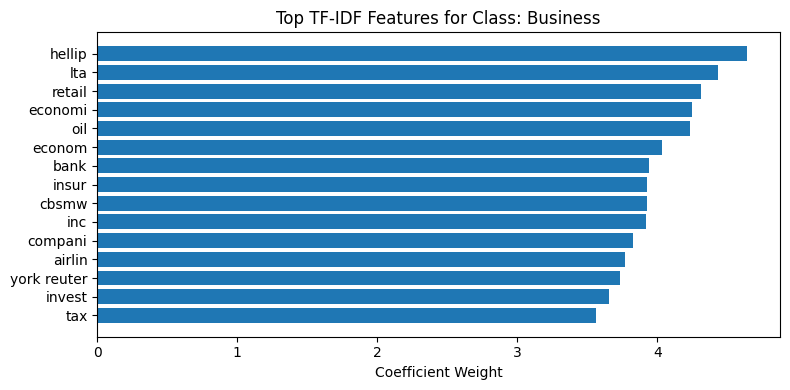

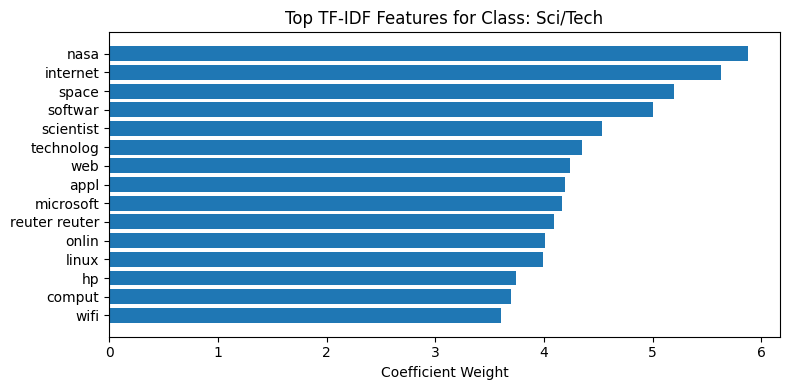

In [53]:
feature_names = vectorizer.get_feature_names_out()
coeffs = clf.coef_  # shape: [n_classes, n_features]
top_n = 15

for class_index, class_name in label_map.items():
    top_features = coeffs[class_index - 1].argsort()[-top_n:]
    top_feature_names = [feature_names[i] for i in top_features]

    plt.figure(figsize=(8, 4))
    plt.barh(range(top_n), coeffs[class_index - 1][top_features], align='center')
    plt.yticks(range(top_n), top_feature_names)
    plt.title(f"Top TF-IDF Features for Class: {class_name}")
    plt.xlabel("Coefficient Weight")
    plt.tight_layout()
    plt.show()

### 💾 Save model & vectorizer

In [54]:
import pickle

In [55]:
with open("news_model.pkl", "wb") as f:
    pickle.dump(clf, f)

In [56]:
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)